<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch03_05_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EC%82%B0%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.05. 기초통계 - 산포통계량
---
* 날짜:
* 이름:

## 학습내용
    * 산포 통계량
      - 분산
      - 표준편차
      - 변동계수
      - 스케일링
      - 범위와 사분위 범위

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import *
sns.set_style(sns.set(color_codes=True))
plt.rcParams['figure.figsize'] = [12, 8]
plt.style.use('dark_background')

##  산포 통계
---

* 산포란 데이터가 얼마나 퍼져있는지를 의미

* 따라서 산포 통계량이란 데이터의 산포를 나타내는 통계량이라 할 수 있다.

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```


* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [18]:
# 넘파이 랜덤 시드 0으로 설정

# 넘파이 배열 `a1`로 바인딩

# 판다스 시리즈 `s1`로 바인딩

a1 = np.random.normal(0, 1, 100)
s1 = pd.Series(a1)

* 평균 0, 표준편차 3인 정규분포 데이터 1000개를 생성하기

In [19]:
# 넘파이 랜덤 시드 0으로 설정

# 넘파이 배열 `a3`로 바인딩

# 판다스 시리즈 `s3`로 바인딩

a3 = np.random.normal(0, 3, 100)
s3 = pd.Series(a3)

* `a1`와 `a3`의 분포 그리기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


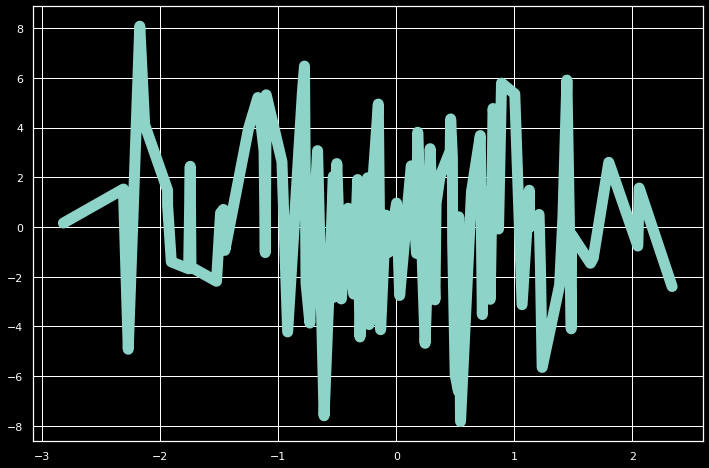

In [22]:
sns.lineplot(a1, a3, linewidth=11)
# plt.plot(a3)
# plt.show()

### **| 분산**

\begin{align}
var(x) = \frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1} 
\end{align}
\begin{align}
 & \\
 & x_i :? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.var(a, ddof) 
a.var(ddof)
s.var(ddof)
```

* `a1`과 `a3`의 분산을 계산

In [41]:
print(np.var(a3))
print(np.var(a1))
print(a3.var())
print(a1.var())
print(s3.var())
print(s1.var())

10.521783626660449
1.2237653143918934
10.521783626660449
1.2237653143918934
10.628064269353988
1.2361265801938315


### **| 표준편차**


\begin{align}
std(x)= \sqrt{var(x)} = 
\sqrt{\frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1}} 
\end{align}
\begin{align}
 & \\
 & x_i : ? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.std(a, ddof) 
a.std(ddof)
s.std(ddof)
```

* `a1`과 `a3`의 표준편차 계산

In [43]:
print(np.std(a1))
print(np.std(a3))
print(a1.std())
print(a3.std())
print(s3.std())
print(s1.std())

1.1062392663397433
3.24372989422061
1.1062392663397433
3.24372989422061
3.260071206178477
1.111812295396049


* `a1`의 분산과 `a1`의 표준편차제곱을 비교

In [71]:
def div(x1, x2):
    if x1 > x2:
        return f'{x1} - {x2} = {x1 - x2}'
    elif x2 > x1:
        return f'-{x2} - {x1} = -{x2 - x1}'
    else:
        return f'{x1} = {x2}'

# 분산 - 표준편차
div(np.var(a1), np.std(a1))

'1.2237653143918934 - 1.1062392663397433 = 0.11752604805215006'

### **| 변동계수**

분산 혹은 표준편차를 스케일에 영향을 받지 않도록 데이터를 스케일링 한 후 분산 혹은 표준편차를 계산


\begin{align}
변동계수 = \frac{var(x) \ or \ std(x) }{Scale(x)} 
\end{align}


#### **변동계수의 필요성**

* `a1`의 모든 요소에 10을 곱한 배열 `a10`을 생성

In [67]:
a10 = []
for i in a1:
    a10.append(i * 10)

* `a1`과 `a10`의 분산 계산

In [72]:
div(np.var(a1), np.var(a10))

'-122.3765314391893 - 1.2237653143918934 = -121.15276612479741'

#### **스케일링: min-max**

**min-max scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
minmax(x)=\frac{x-min(x)}{max(x)-min(x)}
\end{align}

\begin{align}
 & \\
 & x : ? \\
 & min(x) : ?\\
 & max(x) : ?\\ 
\end{align}



* min-max 함수 생성

In [88]:
def minmax(x):
    return (x - min(x)) / (max(x) - min(x))

def uar(x):
    return (x - (sum(x)/len(x)))/(len(x)-1)

* `a1`을 min-max scaling 하여 `a1_minmax` 로 바인딩

In [ ]:
 minmax(a1)

* `a10`을 min-max scaling 하여 `a10_minmax` 로 바인딩

In [ ]:
 minmax(a10)

* `a1`과 `a1_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

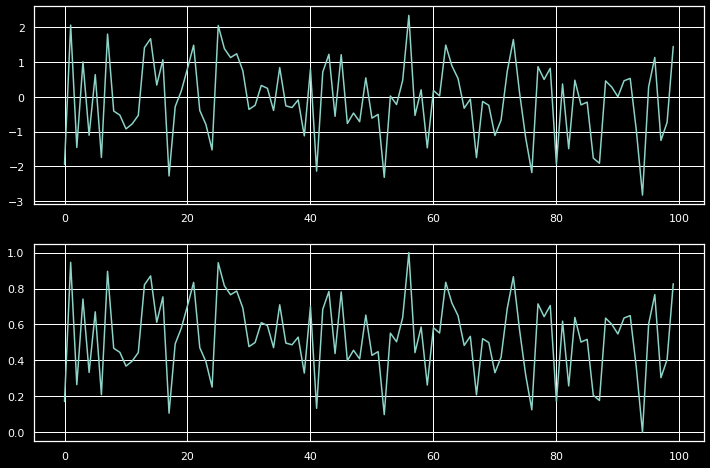

In [86]:
plt.subplot(2, 1, 1)
plt.plot(a1)
plt.subplot(2, 1, 2)
plt.plot(minmax(a1))
plt.show()

* `a10`과 `a10_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

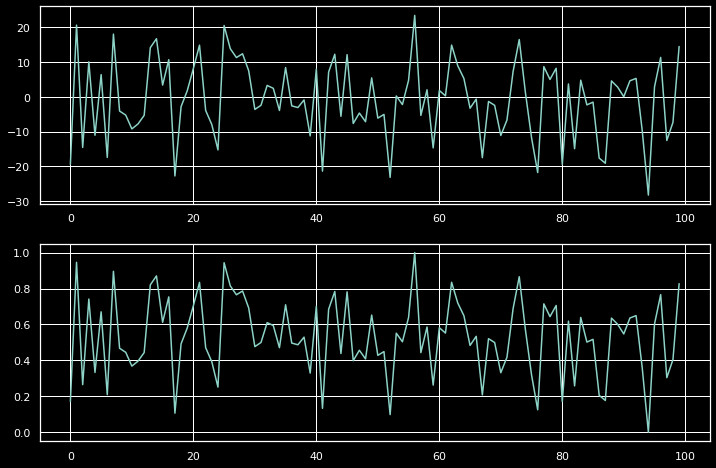

In [87]:
plt.subplot(2, 1, 1)
plt.plot(a10)
plt.subplot(2, 1, 2)
plt.plot(minmax(a10))
plt.show()

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [ ]:
# => 0~1

* 스케일링 후 `a1_minmax`, `a10_minmax`의 분산 구하기

In [92]:
print(np.var(minmax(a1)))
print(np.var(minmax(a10)))

0.04599159265126068
0.04599159265126069


#### **스케일링: z-score**

**standard(z-socre) scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
\\
standard(x)=\frac{x-\mu}{\sigma}
\end{align}
\begin{align}
 & \\
 & x : ? \\
 & \mu : ?\\
 & \sigma : ?\\ 
\end{align}


* standard 함수 생성

In [103]:
def MM(x):
    return (x - min(x)) / (max(x) - min(x))

def U(x):
    return var(x)

def S(x):
    return (x-(x-1))/np.std(x)

* `a1`을 standard 하여 `a1_standard` 로 바인딩

In [104]:
S(a1)

array([0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396357,
       0.90396357, 0.90396357, 0.90396357, 0.90396357, 0.90396

* `a10`을 standard 하여 `a10_standard` 로 바인딩

* `a1`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

* `a10`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [ ]:
1~-1

* 스케일링 후 `a1_standard`, `a10_standard`의 분산 구하기

### **| 범위와 사분위 범위**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0305-01.png?raw=true?raw=true width=800>
</p>


* `a10` 의 분포 그리기

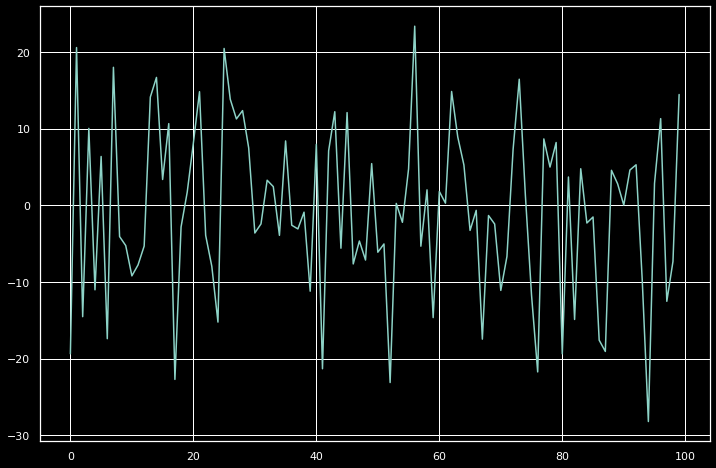

In [106]:
plt.plot(a10)

#### **범위**

\begin{align}
\\
범위 = max(x)-min(x)
\end{align}

```
np.ptp(x)
```

* `a10`의 범위 구하기

In [108]:
# np.ptp 사용

# max-min 사용

np.ptp(a10), MM(a10)

(51.58338586947307,
 array([0.17121844, 0.94591369, 0.26522726, 0.74153245, 0.33317417,
        0.67045513, 0.20953935, 0.8959924 , 0.46782097, 0.44512374,
        0.36841775, 0.39604883, 0.44381196, 0.82065144, 0.87039347,
        0.61223662, 0.753525  , 0.10655587, 0.49215456, 0.58007997,
        0.70446599, 0.83431048, 0.4710001 , 0.39262584, 0.25153014,
        0.94365911, 0.81517501, 0.76544966, 0.78649674, 0.69188744,
        0.47684883, 0.49990497, 0.6103603 , 0.59421285, 0.47091197,
        0.70976074, 0.49654309, 0.48720853, 0.52955511, 0.32968164,
        0.7012198 , 0.13350758, 0.6848804 , 0.78368388, 0.43841863,
        0.78145851, 0.39864612, 0.45664869, 0.40849408, 0.65241756,
        0.42824929, 0.4491823 , 0.09865197, 0.55167003, 0.50392186,
        0.63903963, 1.        , 0.44349753, 0.58603778, 0.26289292,
        0.58205224, 0.55239108, 0.83485684, 0.71974891, 0.64896287,
        0.48344171, 0.5342082 , 0.20839731, 0.52111725, 0.49960678,
        0.33163808, 0.417599


#### **사분위 범위**

\begin{align}
\\
사분위 범위 = 3사분위수 - 1사분위수 = 하위 75 \% 수 - 하위 25\% 수
\end{align}

```
np.quntile(x, percent)
```

* `a10`의 사분위 범위 구하기

In [120]:
q3 = np.quantile(MM(a10), 0)
q1 = np.quantile(MM(a10), 0.25)
q75 = np.quantile(MM(a10), 0.5)
q25 = np.quantile(MM(a10), 0.75)
print(
    q3
    ,q1
    ,q75
    ,q25)

0.0 0.4033493203029374 0.5318816593038698 0.6891474053723669
